# 安装ros
### 官方安装网址：http://wiki.ros.org/cn/ROS/Installation
### 第三方教程：http://wiki.ros.org/cn/ROS/Tutorials/InstallingandConfiguringROSEnvironment
### 安装步骤：
>1. 设置sources.list来设置下载ros的地址
>>注意：ubuntu的下载源要和sources.list 更改的下载源一致
>2. 设置密匙
>3. 更新apt
>4. 安装桌面完整版
>5. 初始化rosdep
>>注意：
>>1. 安装 python-rosdep 解决 rosdep not found 错误
>>2. 按照网址方法添加镜像代理解决 update readed time out 错误 https://blog.csdn.net/Kenny_GuanHua/article/details/116845781
>>3. 最简单解决 rosdep init 错误的方法：https://www.cnblogs.com/jasonchan1202/p/12929308.html
>6. 设置环境
>7. 构建工厂依赖
# 创建ros工作空间
### 官方安装网址：http://wiki.ros.org/cn/ROS/Tutorials/InstallingandConfiguringROSEnvironment
>1. **创建构造一个catkin工作空间**
>> 1. mkdir -p ~/工作目录名/src (-p表示创建递归文件夹，因工作空间必须要src文件夹，所以递归创建工作目录内有src文件夹)
>> 2. cd ~/工作空间目录/
>> 3. catkin_make -DPYTHON_EXECUTABLE=/usr/bin/python3 (构建Python3实现ROS)
>>>注意：解决构建Python3环境报错
>>>1. 安装Python3依赖：
>>>>1. sudo apt update
>>>>2. sudo apt install -y python3 python3-dev python3-pip build-essential
>>>2. 安装Python3ROS包：
>>>>1. sudo -H pip3 install rosdep rospkg rosinstall_generator rosinstall wstool vcstools catkin_tools catkin_pkg (-H　　按照passwd文件中指定的目标用户（默认为超级用户）的主目录设置HOME环境变量。)
>>>3. 再次在工作目录运行构建Python3的catkin_make，若不行，重新rosdep update再试
>2. **设置工作空间的环境变量**
>>1. source devel/setup.bash (source:运行文档脚本的命令，.bash文件：环境变量配置文件)
>3. **查看工作空间环境变量是否正确覆盖**
>>1. echo ＄ROS_PACKAGE_PATH (echo为打印字符串的命令，＄后跟的是变量名，此命令目的为打印变量ROS_PACKAGE_PATH内的内容)

# 在工作空间中创建ros包
### 官方构建网址：http://wiki.ros.org/cn/ROS/Tutorials/CreatingPackage
>1. **进入工作空间的src文件夹**
>2. **catkin_create_pkg 包名 依赖库**  ：依赖库一般填（std_msgs rospy roscpp）
>3. **现在你发现在src下创建了一个包文件夹，内部有 package.xml（提供关于包的描述，维护者，许可证，依赖的标签）和CMakeLists.txt两文件**
>>文件CMakeLists.txt是CMake构建系统的输入，用于构建软件包。任何兼容CMake的软件包都包含一个或多个CMakeLists.txt文件，这些文件描述了如何构建代码以及将代码安装到何处。
>>![cm](cmake.png)
>4. **在工作空间 catkin_make**
>5. **source 一下devel里的配置文件 setup.bash**

# ros工作空间文件系统
![img](http://www.autolabor.com.cn/book/ROSTutorials/assets/%E6%96%87%E4%BB%B6%E7%B3%BB%E7%BB%9F.jpg)
**WorkSpace --- 自定义的工作空间**

    |--- build:编译空间，用于存放CMake和catkin的缓存信息、配置信息和其他中间文件。

    |--- devel:开发空间，用于存放编译后生成的目标文件，包括头文件、动态&静态链接库、可执行文件等。

    |--- src: 源码

        |-- package：功能包(ROS基本单元)包含多个节点、库与配置文件，包名所有字母小写，只能由字母、数字与下划线组成

            |-- CMakeLists.txt 配置编译规则，比如源文件、依赖项、目标文件

            |-- package.xml 包信息，比如:包名、版本、作者、依赖项...(以前版本是 manifest.xml)

            |-- scripts 存储python文件

            |-- src 存储C++源文件

            |-- include 头文件

            |-- msg 消息通信格式文件

            |-- srv 服务通信格式文件

            |-- action 动作格式文件

            |-- launch 可一次性运行多个节点 

            |-- config 配置信息

        |-- CMakeLists.txt: 编译的基本配置



# ros基本命令
### 官方教程http://wiki.ros.org/cn/ROS/Tutorials/NavigatingTheFilesystem
### 增：
#### catkin_create_pkg 自定义包名 === 创建新的ros包
#### sudo apt install xxx === 安装ros功能包
### 删：
#### sudo apt purge xxx ==== 删除某个功能包及其配置文件
### 查：
#### apt search xxx === 搜索某个功能包
#### rospack
>1. rospack find ros包内的软件包名（如rospy）：输出该软件包详细地址
>2. rospack depends ros包名 :输出该ros包的所有依赖，无论是一级还是其他
>3. rospack depend-on ros包名：输出该ros包的所有一级依赖
>4. rospack list ：列出所有功能包
#### roscd
>1. roscd ros包内的软件包名 ：立即切换到软件包的位置，可用pwd打印 
>2. roscd rospy/cmake ：也能切换到一个软件包的子集中
#### rosls
>1. rosls ros包内的软件包名：显示软件包名下的文件
#### roscp
>1. roscp 要复制的文件包名 要复制的文件 目标地址 ：将文件复制到目标地址
#### 按Tab可以补全包名，双击Tab可以查看文件
### 改：
#### rosed 包名 文件名 === 修改功能包文件 （需有vim）如:rosed turtlesim Color.msg
### 执行：
#### roscore === 是 ROS 的系统先决条件节点和程序的集合， 必须运行 roscore 才能使 ROS 节点进行通信。
> roscore 将启动:

>+ ros master

>+ ros 参数服务器

>+ rosout 日志节点
#### rosrun 包名 可执行文件名 === 运行指定的ROS节点，如:rosrun turtlesim turtlesim_node
#### roslaunch 包名 launch文件名 === 执行某个包下的 launch 文件

# ros通信机制（节点与节点之间如何通讯）
### 1、话题通信：
#### http://www.autolabor.com.cn/book/ROSTutorials/di-2-zhang-ros-jia-gou-she-ji/22hua-ti-tong-xin/211-li-lun-mo-xing.html
![topic](topic.png)
> **Talker 与 Listener 连接建立后，不再需要 ROS Master。也即，即便关闭ROS Master，Talker 与 Listern 照常通信。**

### 2、服务通信：
#### http://www.autolabor.com.cn/book/ROSTutorials/di-2-zhang-ros-jia-gou-she-ji/23-fu-wu-tong-xin/221-fu-wu-tong-xin-li-lun-mo-xing.html
![server](server.png)
**注意:**

>1.客户端请求被处理时，需要保证服务器已经启动；

>2.服务端和客户端都可以存在多个。

### 3、参数服务器通信：
#### http://www.autolabor.com.cn/book/ROSTutorials/di-2-zhang-ros-jia-gou-she-ji/24-can-shu-fu-wu-qi/231-can-shu-fu-wu-qi-li-lun-mo-xing.html
![param](param.png)
>**注意:**参数服务器不是为高性能而设计的，因此最好用于存储静态的非二进制的简单数据


# ros节点理论
### 官方教程：http://wiki.ros.org/cn/ROS/Tutorials/UnderstandingNodes
### ros通过节点（nodes）与节点利用消息（massages）在话题（topics）中通讯来提供和使用服务。
![tu](图.png)
#### roscore 主节点（master）运行所有ros程序前要运行的命令
#### rosrun 可以让你用包名直接运行包内的节点
> **rosrun [package_name] [node_name]**
> 可以改变节点名字：**rosrun turtlesim turtlesim_node __name:=my_turtle**
#### rosnode 获得节点信息的ros工具
> + 列出所有活动的节点：**rosnode list**
> + 列出某节点的信息： **rosnode info /某节点**
> + 查看某节点的运行情况：**rosnode ping 某节点**

# ros话题理论
### 官方教程：http://wiki.ros.org/cn/ROS/Tutorials/UnderstandingTopics
#### 1、运行实例turtlesim 让turtlesim与turtle_teleop_key通讯，并依靠rqt_graph来显示当前运行的节点和话题。
>1. **roscore** === 打开主节点（master）
>2. **rosrun turtlesim turtlesim_node** === 打开节点
>3. **rosrun turtlesim turtle_teleop_key** === 打开节点
>4. **rqt_graph** === 打开计算图
![rqt](rqt_c.png)
#### 2、rostopic 获得话题信息的ros工具（用rostopic -h 查看命令）
>+ **rostopic bw /话题** === 显示话题使用的带宽
>+ **rostopic delay /话题** === 显示话题从时间戳到头文件的延迟
>+ **rostopic echo /话题** === 显示话题所发出的消息
>>**如：rostopic echo /turtle1/cmd_vel** === 显示键盘传给乌龟的信息
>+ **rostopic find 消息** === 按照消息寻找话题
>+ **rostopic hz /话题** === 显示话题的发布速率
>+ **rostopic info /话题** === 显示话题的信息
>+ **rostopic list (-命令)** === 列出话题
>>**命令：**
>>![topic](list.png)
>+ **rostopic type /话题** === 显示话题的消息
>+ **rostopic pub （-命令） /话题 消息 -- '参数'** === 将数据发布到话题
>>**如：rostopic pub -r 1 /turtle1/cmd_vel geometry_msgs/Twist -- '[2.0,0.0,0.0]' '[0.0,0.0,2.0]** === 以1hz的频率发送数据，使乌龟以角速度2，x轴速度2的方式绕圈圈
>+ **rqt_plot** === rqt_plot命令可以在滚动时间图上显示发布到某个话题上的数据。
## 消息msg详解
### 官方教程：http://wiki.ros.org/cn/ROS/Tutorials/CreatingMsgAndSrv
### 第三方：http://www.autolabor.com.cn/book/ROSTutorials/di-2-zhang-ros-jia-gou-she-ji/22hua-ti-tong-xin/214-hua-ti-tong-xin-zhi-zi-ding-yi-xiao-xi.html
### 1、msg文件详解
**在 ROS 通信协议中，数据载体是一个较为重要组成部分，ROS 中通过 std_msgs 封装了一些原生的数据类型,比如:String、Int32、Int64、Char、Bool、Empty.... 但是，这些数据一般只包含一个 data 字段，结构的单一意味着功能上的局限性，当传输一些复杂的数据，比如: 激光雷达的信息... std_msgs 由于描述性较差而显得力不从心，这种场景下可以使用自定义的消息类型**
+ msg（消息）：msg文件就是文本文件，用于描述ROS消息的字段。它们用于为不同编程语言编写的消息生成源代码。msg文件存放在软件包的msg目录下.
![msg](msg.png)

### 2、msg文件的创建
1. 在自己的ros包中创建一个msg文件夹，里面用来存放自己写的 .msg 文件
2. 取消 package.xml 里这两行的注释，来增添依赖
![depend](depend.png)
3. 在 CMakeLists.txt 中的 find_package 添加 message_generation 依赖(上步增添的)
![cd](c_depend.png)
4. 在 catkin_package 添加 message_runtime 依赖，确保运行时有依赖
![rd](run_depend.png)
5. 在 add_message_files 添加自己写的 .msg 文件
![amsg](add_msg.png)
6. 取消 CMakeLists.txt 里这几行注释，确保 generate_message()函数能被调用
![gm](gm.png)
7. 在工作空间 catkin_make 编译，完成 msg 配置，可通过 rosmsg show查看
8. 注意在创造自己的msg文件时，引用别的msg包的消息内容要查看别的包里面如何定义
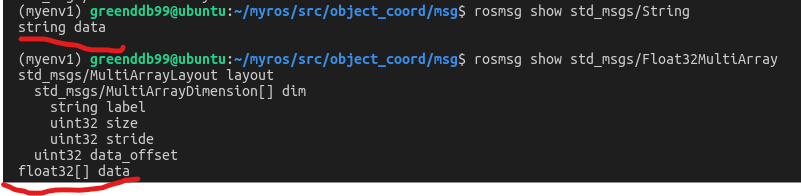
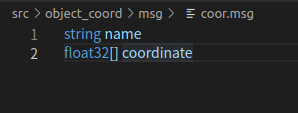

**惊天巨坑，配置好后catkin_make出现【Invoking "make -j8 -l8" failed】错误，原因未知，用【rm -rf build devel】后解决**

### 3、rosmsg 用于显示消息信息的命令
![rosmsg](rosmsg.png)
1. **rosmsg show === 消息或消息的地址如【std_msgs/String】显示消息的类型**
2. **rosmsg list === 列出所有消息**
3. **rosmsg package ros包名 === 列出该包内含的消息**
4. **rosmsg packages === 显示出拥有消息的所有功能包

### 4、用python编写发布者和订阅者节点
1. **将 .py文件写在 scripts 文件夹**
2. **写好后将写好的发布者和订阅者 .py文件添加到 CMakeLists.txt 的catkin_install_python中**
3. **都编辑好后在工作空间 catkin_make 来编译，后 source 一下setup.bash文件（添加到.bashrc的可以不用source）**
4. **将两文件改为可执行，用chmod**
5. **运行roscore**
6. **rosrun ros包 .py文件**

### 一、【发布者】
1. **用到两个库，一是rospy库，另一个是信息格式std_msgs.msg里的String**

2. **talker代码：**
![talker](talker.png)

3. **代码详解**https://www.ncnynl.com/archives/201611/1059.html
**第一行改为自己conda的python解释器【#!/home/greenddb99/miniconda3/envs/myenv1/bin/python】**

>1. **3，4行引用相应的功能库**

>2. **6-14行定义了一个talker的函数**

>3. **7行创建了一个发布者，话题名为chatter，信息类型为std_msg.msg里的String，消息排队长度为10【当发送快接受慢时就会发生信息排队】**

>4. **8行初始化节点，使节点名为talker，并且用anonymous(匿名)在节点名后加上随机数，使系统可以运行多个 talker.py 而不会发生节点冲突。**
**详见：**
![in](init_node.png)
https://www.ncnynl.com/archives/201611/1070.html

>5. **9行创建一个Rate类的对象rate，频率为10hz，即一秒十次，即持续时间为十分之一秒，后面14行可以用Rate的方法sleep，即睡眠一个持续时间。最终效果则让循环一秒执行十次。**

>6. **10-14行定义了一个循环，在 rospy.is_shutdown()为True时跳出循环(即节点被关闭，类似Ctrl+C)**
**详见：**
![sd](shutdown.png)
https://www.ncnynl.com/archives/201611/1070.html

>7. **11行用的旧字符串初始化方法**
**详见：**
![format](format.png)

>8. **11行 rospy.get_time() 获得当前的浮点值秒数**
**详见：**
![time](time.png)
https://www.ncnynl.com/archives/201611/1074.html

>9. **12行因为在8行初始化时默认日志级别为INFO，即rosout为info，所有将要输入的内容给到rospy.loginfo()系统将会output info，可以在终端和rqt_console里看到。**

>10. **13行将信息发布到话题中，通过rospy.Publisher.publish()**

>11. **14行在第五点有说。**

>12. **16行说明当程序运行到主函数时，即当前函数时而非引用的模块时运行**

>13. **17-18行表示执行talker()函数**

>14. **19-20行表示当通过一些方法让节点关闭时，系统将会输出 rospy.ROSInterruptException 异常，此写法让系统抛出该异常时执行pass。**

### 二、【订阅者】
1. **用到和发布者同样的库**

2. **listener代码**
![listener](listener.png)

3. **代码详解**https://www.ncnynl.com/archives/201611/1059.html
**第一行改为自己conda的python解释器【#!/home/greenddb99/miniconda3/envs/myenv1/bin/python】**

>1. **2，3行引用相应的功能库**

>2. **第5~6行定义了一个回调函数，第17行当订阅者 rospy.Subscriber 在 chatter 话题里接受到String 类型的信息时，将信息作为参数传给 callback ，此时输入 date 即为发布出来的 String 因此 date.date 实际上即为 String.date，是一个字符串，后通过字符串初始化给到 %s 里。rospy.get_caller_id() 输出发布者发布时的 id 号，注意中间用 + 连接！！！！**

>3. **第8~20行定义了一个 listener函数**

>4. **第15行初始化了订阅者的节点，名为 listener 并且加上随机数**

>5. **第17行创建了一个订阅者，订阅的话题为 chatter ，信息类型为String，获取的内容传给callback函数**

>6. **第20行 rospy.spin() 表示保持节点运行直到节点被关闭**
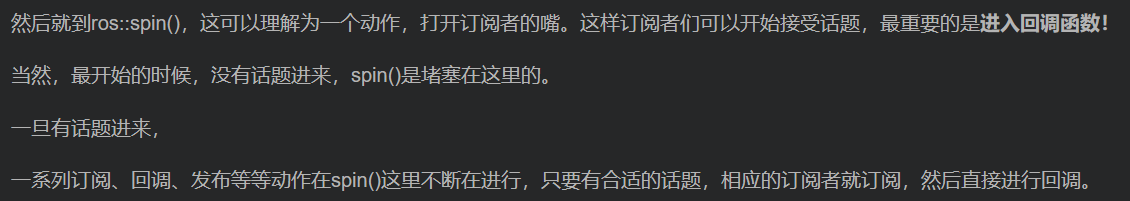

### 最终效果
![rqt_tl](rqt_tl.png)






# ros服务与参数理论
### 官方教程：http://wiki.ros.org/cn/ROS/Tutorials/UnderstandingServicesParams

### 1、rosservice 用于使用或调用服务的命令
![service](service.png)
>1. **rosservice list** === 列出活动中的服务
>2. **rosservice type 服务** === 列出服务的类型（可知该服务需不需要参数）
>>如乌龟转圈拥有的服务类型：![tc](tc.png)
>3. **rosservice call 服务 参数** === 调用此服务
>>如：rosservice call /clear === 清除turtlesim背景上的轨迹
>>如：rosservice call /spawn 2 2 0.2 "" === 在x=2，y=2，朝向=0.2，不设置命名的地方产出新乌龟（因未命名，所有系统会返回新乌龟的名字）
>>**/spawn的信息通过“rosservice type /spawn | rossrv show”显示**

### srv文件详解
**srv（服务）：一个srv文件描述一个服务。它由两部分组成：请求（request）和响应（response），srv文件则存放在srv目录下。**
+ srv文件和msg文件一样，只是它们包含两个部分：请求和响应。这两部分用一条---线隔开。
![srv](srv.png)

### srv文件的创建和使用方法
1. 在自己的ros包里创建一个 srv 文件夹 ，里面放自己写的 .srv 文件
2. 尝试用 roscp 从另一个包里复制 .srv 文件代替手动创建新 .srv 文件
![cs](cp_srv.png)
3. 同msg的第二步，将package.xml的那两个注释消除
4. 同msg的第三步，将CMakeLists.txt中的fing_package中加message_generaion
5. 在 add_service_files 中加上自己的 .srv 文件
6. 在工作空间 catkin_make 

### 2、rossrv 用于显示服务类型信息的命令，与rosmsg高度雷同
https://zhuanlan.zhihu.com/p/354381936
![rossrv](rossrv.png)
**所有的命令的目标都为服务的信息，即rosservice type**

### 3、rosparam 用于操作和储存参数服务器上的数据
![rosparam](rosparam.png)
>1. **rosparam list** === 查看参数服务器上有哪些参数
>>如乌龟转圈拥有的参数：![tcp](tcp.png)
>2. **rosparam get 参数名** === 获得相应参数
>>**rosparam get / === 可显示参数服务器中的所有内容**
>3. **rosparam set 参数名 参数** === 设置相应参数
>>如：rosparam set /turtlesim/background_r 150 === 将背景红色通道数改为150，呼叫clear服务后生效
>4. **rosparam dump 文件名 参数空间** === 将参数空间的参数存入文件中（.yaml格式）
>>**rosparam dump *.yaml** === 将全部参存入某.yaml文件中
>5. **rosparam load 文件名 参数空间** === 将文件中的数据载入新的命名空间中
>>**rosparam load param.yaml copy_turtle** === 将文档中的数据存入copy_turtle空间中，可以用“rosparam get /copy_turtle”查看

### 4、用python编写服务与客户端
1. **将 .py文件写在 scripts 文件夹**
2. **写好后将写好的服务端者和客户者 .py文件添加到 CMakeLists.txt 的catkin_install_python中**
3. **都编辑好后在工作空间 catkin_make 来编译，后 source 一下setup.bash文件（添加到.bashrc的可以不用source）**
4. **将两文件改为可执行，用chmod**
5. **运行roscore**
6. **rosrun ros包 .py文件**

### 一、【服务端】
**目的是将客户端输入的request处理后respond出来。**
1. **service代码**
![fw](服务.png)

2. **官方教程：http://wiki.ros.org/cn/ROS/Tutorials/WritingServiceClient%28python%29**

3. **代码详解**
**!!将第一行修改为自己conda的环境：【#!/home/greenddb99/miniconda3/envs/myenv1/bin/python】**
>1. **第3行不需要，其用处在于若ros使用的是python2，那么这行可以导入python3格式的print，即可以用python3的格式写print**

>2. **第5行从srv目录中导入 AddTwoInts 和 AddTwoIntsResponse**
![sc](service_class.png)
https://www.ncnynl.com/archives/201611/1072.html

>3. **第8-10行创建了一个处理 request 输入信息并且通过 respond 输出的方法(一种用来回调的函数)，由回调函数原理知此时方法的参数 req 为那个 .srv文件 ，因此 req.a 即为 .srv文件定义的a，req.b类似。**

>4. **第10行使方法执行完后返回一个 Respond操作，resopnd 为a与b的和，即服务的目的**

>5. **第12-16行创建了一个服务和节点。**

>6. **第13行初始化一个名为 add_two_ints_server 的节点**

>7. **第14行创建了一个名为 add_two_ints ，类型为 AddTwoInts(第5行导入)，回调函数为上述第3点的服务。**

>8. **第15行输出字符串**

>9. **第16行 rospy.spin() 保持代码运行直到节点被关闭**

>10. **第18行 if函数表明当代码执行到主程序时运行下面的函数**

**【过程详解：当代码运行到主程序时，激活 add_two_ints_server() 函数，运行此函数：1、初始化一个节点；2、创建一个服务并且同时激活服务以至于客户端可以发送的 request输入请求；3、打印 Ready to add two ints 4、执行到rospy.spin()等待客户端输入2个数作为request；5、当客户端有输入时，执行回调函数，回调函数输出 Returning [x+y]=sum ,并且将 sum respond给 .srv 】**

### 二、【客户端】
**目的是发出 request 并且按顺序读取终端的输入赋值给服务的 a，b ，并且接受并处理 respond 的 sum。**
2. **client代码**
![client](client.png)

3. **代码详解：**
**!!将第一行修改为自己conda的环境：【#!/home/greenddb99/miniconda3/envs/myenv1/bin/python】**
>1. **第9-16行，创建了一个等到服务端的 add_two_ints 服务被激活后即创建一个对该服务的请求，并且将终端输入的 x,y 当作 request 输入给 .srv ，并且返回一个服务端处理好的 sum。当出现rospy.ServiceException错误时执行打印字段。**

>2. **第10行，为直到服务端 add_two_ints 被创建前，程序都被阻塞在这一行。**
>3. **第12行，为创建一个对服务 add_two_ints 类型为 AddTwoInts 的请求，这样后面就可以向调用函数一样调用服务的内容。**

>4. **第13行，为将键盘输入的 x，y 当作 request 输入给服务**

>5. **第14行，为返回一个服务 respond 处理好的 sum值。**

>6. **第15-16行，为当程序出现 rospy.ServiceException 异常时执行下面的 print**

>7. **第18-19行，创建了一个提醒客户如何输入 request 的教程的函数；将 sys.argv[0]给到 %s ，sys.argv[0]即为当前文件的路径。**
>> **sys.argv[]详解: sys.argv[]即为一个列表，将执行当前文件时后面的输入存进去，sys.argv[0]为当前文件的路径，sys.argv[1]为输入的第一个内容.....**

>8. **第21-29行，主程序。**

>9. **第21行，函数执行到主程序时向下执行**

>10. **第22行，当从终端输入的内容有2个时向下执行（0为路径，1，2为输入内容）**

>11. **第23-24行，将输入的第一个数赋给x，第二个数赋给y**

>12. **第25-27行，若输入内容不等于2个时执行**

>13. **第26行，打印那个提醒客户如何输入 request 的函数内容**

>14. **第27行，sys.exit(1) 输出异常的终端程序【sys.exit(0)不输出异常】**

>15. **第28行，输出相应内容

>16. **第29行，输出相应 x ，y 和 add_two_ints_client(x,y)的return。

**【过程详解：当代码运行到主程序时，即用了rosrun mypkg \*.py 后则为执行到主程序，1、if先判断刚刚rosrun 时有没有在后面带上两个数，若带上了两个数则将第一个数赋值给x，第二个数赋值给y，若没有带上两个数，执行打印函数 usage() 并且退出程序；2、若带上了两个数，打印 Requesting x+y；3、将 x,y给到函数 add_two_ints_client(x,y),由 rospy.ServiceProxy 获得服务的请求而后将 x,y 通过请求给服务送 request ,而后返回出由服务端执行好 respond 的sum值。最后打印出 x+y=sum】

### 5、运用参数服务器存取修改数据
https://www.ncnynl.com/archives/201611/1061.html
http://www.autolabor.com.cn/book/ROSTutorials/di-2-zhang-ros-jia-gou-she-ji/24-can-shu-fu-wu-qi/233-can-shu-caozuo-b-python.html
**【要点：参数服务器为一个公共区域，所有节点都可以在参数服务器存，取修改参数，这是一个很好的寄存简单固定信息的容器，储存方式类似于字典：一个命名空间匹配一个参数，参数可以是 int ， float ， string ， bool ， list ， dict】**

### 一、对参数服务器的几种操作
#### 获取参数
![get_param](get_param.png)
#### 设置参数
![set_param](set_param.png)
#### 删除参数
![del_param](del_param.png)
#### 判断参数是否存在
![has_param](has_param.png)
#### 解释参数名（显示出此参数所在的参数名是哪几个，因为ros可以remap）
![resolve_param](resolve_param.png)
#### 搜索参数（由参数搜索出他的命名空间）
![search_param](search_param.png)

### 二、用python写出实现参数操作的程序
**编写方法大同小异，1、先初始化一个节点；2、用if判断主程序在运行；3、进行相应的参数操作**




# ros调试器
### 官方教程：http://wiki.ros.org/cn/ROS/Tutorials/UsingRqtconsoleRoslaunch
### rqt_console 显示node以massage的output的信息
### rqt_logger_level 可以更改输出信息的类别包括：debug，info，warn，error
![level](level.png)

# 编写launch启动多节点
### 官方教程：http://wiki.ros.org/cn/ROS/Tutorials/UsingRqtconsoleRoslaunch
### 第三方教程：http://www.autolabor.com.cn/book/ROSTutorials/5/45-rosjie-dianguan-li-launch-wen-jian.html
### 1、如何创建launch文件
>1. **在ros包创建一个launch目录，然后转到该目录创建一个 .lanuch 文件**
### 2、如何编写launch文件
>1. **launch标签是所有launch文件的根标签**
>2. **node标签指定ros节点，所带属性查看网址：http://www.autolabor.com.cn/book/ROSTutorials/5/45-rosjie-dianguan-li-launch-wen-jian/412-launchwen-jian-biao-qian-zhi-node.html**
>3. **include标签用于将另一个xml格式的launch文件导入当前文件**
>>![include](include.png)
>4. **remap标签用于重命名话题**
>>![remap](remap.png)
>5. **param标签主要用于在参数服务器上设置参数，参数通过value指定**
>>![param](parameter.png)
>6. **rosparam标签可以从 YAML 文件导入参数，或将参数导出到 YAML 文件，也可以用来删除参数**
>>![rp](rp.png)
>7. **group标签可以对节点分组，用ns(namespace)让节点归属于某个命名空间**
>>![ns](ns.png)
>8. **arg标签用于动态传参，类似于函数的参数，增强launch文件的灵活性**
>>![arg](arg.png)
### 3、实例
![sample](sample.png)
**因此输入: 【rostopic pub /turtlesim1/turtle1/cmd_vel geometry_msgs/Twist -r 1 -- '[2.0, 0.0, 0.0]' '[0.0, 0.0, -1.8]'】 时会两个乌龟同步动，将turtlesim1改为turtlesim2则不会动，因为turtlesim1为mimic的输入**

# ros录制和回放数据
### 官方文档：http://wiki.ros.org/rosbag/Commandline
### 官方教程：http://wiki.ros.org/cn/ROS/Tutorials/Recording%20and%20playing%20back%20data
### 知乎：https://zhuanlan.zhihu.com/p/151444739

### 使用rosbag录制与回放话题发布的信息到 .bag文件
**【常用的rosbag指令】**
#### 【rosbag record 命令 话题名 === 用相应方式记录相应话题内发布的信息】
1. **rosbag record topic-name1 topic-name2 === 记录对应话题的信息到 .bag文件**
![re_t](re_t.png)

2. **rosbag record -a === 记录当前运行的所有话题的信息到 .bag文件**
![re_a](re_a_t.png)

3. **rosbag record -h === 查询帮助**

4. **rosbag record -o .bag文件的文件名 话题名 ==== 记录指定话题的信息到自定义的文件名前缀+时间戳的 .bag文件下**
![re_o_t_name](re_o_t_name.png)

5. **rosbag record -O .bag文件的文件名 话题名 === 记录指定话题的信息到自定义的文件名的 .bag文件下**
![re_O_name](re_O_name.png)

#### 【rosbag info 命令 .bag文件名 === 查看指定 .bag文件的详细记录情况】
1. **rosbag info .bag文件 === 查询指定 .bag文件的详细记录情况**
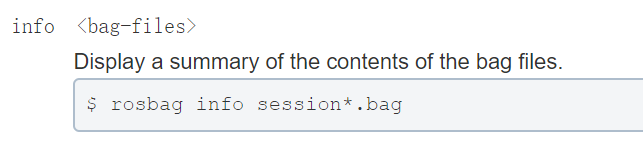

2. **rosbag info -y .bag文件 === 用YAML格式打开 .bag文件的详细记录情况**
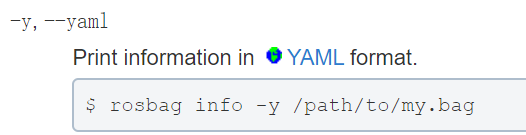

3. **rosbag info -y -k key名 .bag文件 === 显示指定 key的记录的值**
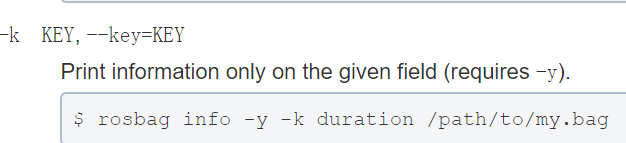

#### 【rosbag play】
1. **rosbag play .bag文件 === 播放指定的 .bag文件，也可以指定多个，可按空格暂停**
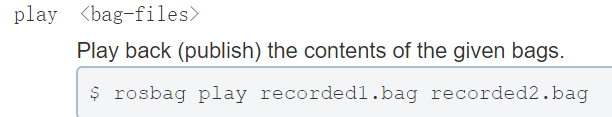

2. **rosbag play --pause .bag文件 === 以暂停的状态打开回放，按空格开始播放**
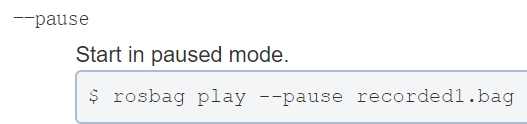

3. **rosbag play -r 数字 .bag文件 === 以某频率发送消息的方式来回放**
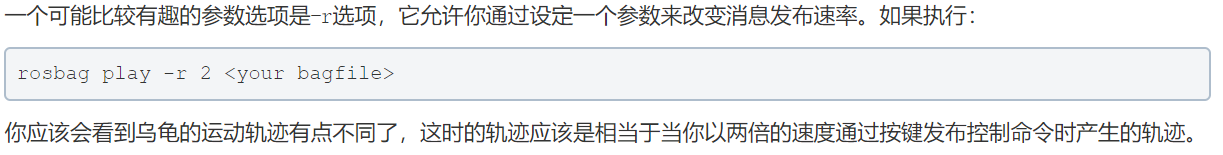

4. **rosbag play -s 秒 .bag文件 === 在第某秒处开始播放回放**
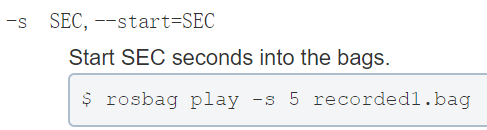

5. **rosbag play -l .bag文件 === 循环播放回放**
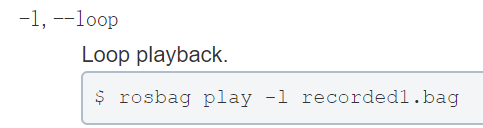

6. **rosbag play --clock --hz=数字 .bag文件 === 以某频率回放**
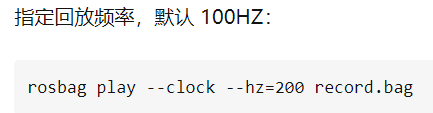

7. **rosbag play .bag文件 --topic /话题1 /话题2 === 播放 .bag文件里的指定话题**
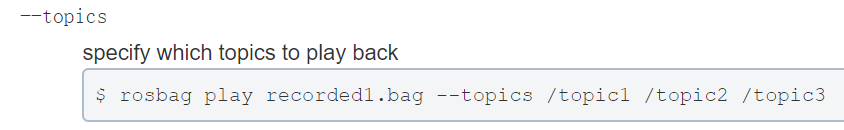

#### 【rosbag check】
1. **rosbag check .bag文件 === 检查该 .bag文件食肉可以播放**
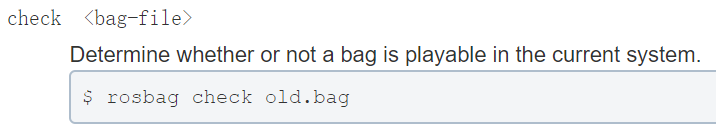

#### 【rosbag compress】
1. **rosbag compress .bag文件 === 将文件压缩成 bz2格式**
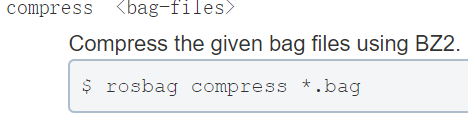

2. **rosbag compress -j .bag文件 === 将文件压缩成 bz2格式**
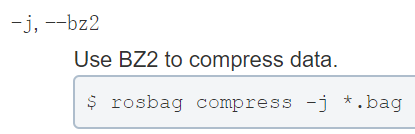

3. **rosbag compress --lz4 .bag文件 === 将文件压缩成 lz4格式**
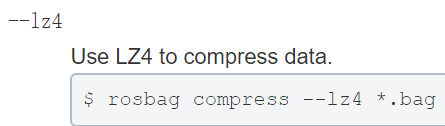

#### 【rosbag decompress】
1. **rosbag decompress .bag文件 === 解压缩 .bag文件**

#### 【rosbag reindex】
1. **rosbag reindex .bag文件 === 修复损坏的 .bag文件**
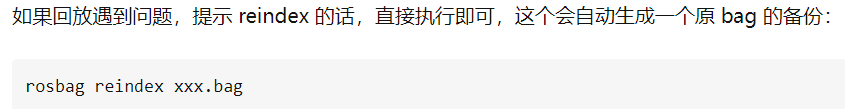


# 读取 .bag文件里面记录的消息
### 官方教程：http://wiki.ros.org/cn/ROS/Tutorials/reading%20msgs%20from%20a%20bag%20file
### cookbook：http://wiki.ros.org/rosbag/Cookbook
### 第三方：http://www.autolabor.com.cn/book/ROSTutorials/di-5-zhang-ji-qi-ren-dao-hang/52-rosbagshi-yong/522-rosbagshi-yong-bian-ma.html


# 使用roswtf检查是否运行有错误，可能可以给debug的我指明方向
### 官方教程：http://wiki.ros.org/cn/ROS/Tutorials/Getting%20started%20with%20roswtf

# 疑惑回答：
# 1、
### 当用rospy.Subscriber('name' , message.type , callback函数)
### 或者rospy.Service('name' , service.type , callback函数)
### 此时，当你写的callback函数的参数即为所定义的信息或者服务类型，即为相应 .msg文件或 .srv。
### 即 def callback(date) 里的 date 实际上为相应的信息或服务类型。
![callback](callback.png)

# 2、
http://www.autolabor.com.cn/book/ROSTutorials/di-3-zhang-ros-tong-xin-ji-zhi-jin-jie/33-pythonmo-kuai-dao-ru.html
视频：《奥特学园》p145
### 当想在ros包内的script下的某执行程序导入某在同一目录下的 .py文件时，单单 import  \*.py 后直接使用，在rosrun 此项目时将会报错说找不到此文件（所引用的）
### 原因是 rosrun的执行路径并非在 script 下，而是在工作空间，因此必定找不到所引用的 .py文件（只有用python执行时才在当前目录）
### 因此这时需要设置临时工作空间，利用 python 中的 sys 和 os。
### sys.path.insert( 0 ,"所引用的文件所在的目录") === 在程序第一行导入此路径
### os.path.abspath(".") === 获取当前路径
【os 教学】：https://zhuanlan.zhihu.com/p/150835193
【sys 教学】：https://zhuanlan.zhihu.com/p/150835014

# 如何写一个python程序来控制乌龟运动
### 实际上就是话题的发布，订阅，服务的调用，参数的设置。
### 与一开始的 rostopic pub -r 1 话题 信息类型 -- ’要设置的参数‘  不同
### 一、话题发布
http://www.autolabor.com.cn/book/ROSTutorials/di-2-zhang-ros-jia-gou-she-ji/25-tong-xin-ji-zhi-shi-cao/251-shi-cao-01-hua-ti.html
**【实现步骤】**
1. **要用rqt_graph 或者 rostopic list 获取要发布信息的话题的话题**
2. **用rqt_graph 或者 rostopic type 获取要发布信息的话题的信息**
3. **用rqt_graph 或者 rosmsg info 获取该信息的格式**
4. **通过以上两点则可以在初始化节点后创建发布者对象 rospy.Pulisher()，以及要import 什么消息的什么消息类型
5. **通过第三点则可以知道以什么格式书写自己想要发布的信息**
**【源代码】**
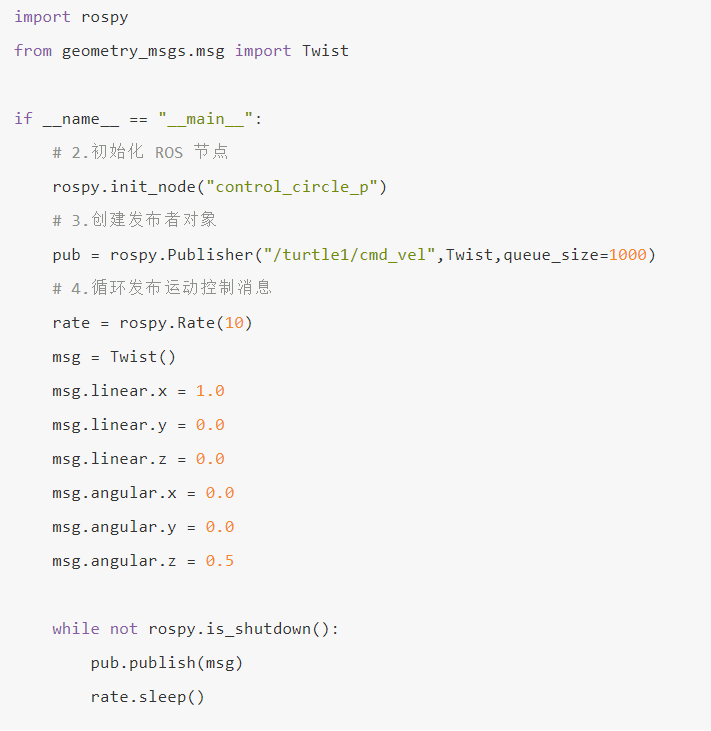

### 二、话题订阅
http://www.autolabor.com.cn/book/ROSTutorials/di-2-zhang-ros-jia-gou-she-ji/25-tong-xin-ji-zhi-shi-cao/252-shi-cao-02-hua-ti-ding-yue.html
**【实现步骤】**
1. **用rostopic list 找到关于乌龟位姿的话题 /turtle/pose
2. **用rostopic type 找到关于乌龟位姿的话题的信息**
3. **用rosmsg info 找到关于乌龟位姿的话题的信息的格式**
4. **利用1，2，3创建订阅者对象 rospy.Subscriber()**
5. **利用3的信息的格式写出回调函数要输出的内容的格式**
**【源代码】**
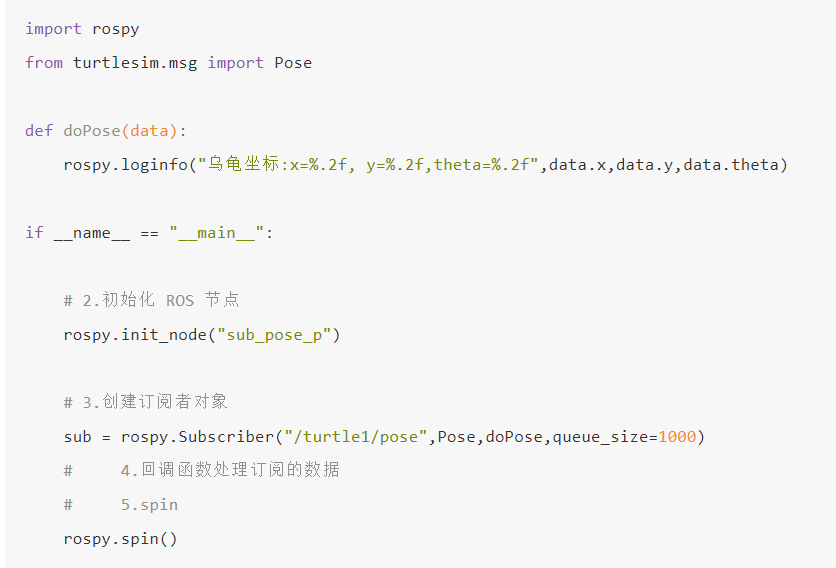

### 三、服务调用
http://www.autolabor.com.cn/book/ROSTutorials/di-2-zhang-ros-jia-gou-she-ji/25-tong-xin-ji-zhi-shi-cao/253-shi-cao-03-fu-wu-diao-yong.html
**【实现步骤】**
1. **用rosservice list 找到关于再生的服务 /spawn **
2. **用rosservice type 找到该服务的类型**
3. **用rossrv info 找到该服务类型的消息格式**
4. **imoprt 服务类型：from turtlesim import Spawn... （服务类型：turtlesim/Spawn）
5. **初始化节点，用rospy.ServiceProxy()引用该服务**
6. **用rospy.wait_for_serve()阻塞**
8. **按照消息格式给 SpawnRequest（）传递需求参数**
9. **对引用的服务使用 .call(需求参数)，来调用服务**
10. **用try ，except 格式来防止意外中断**
**【源代码】**
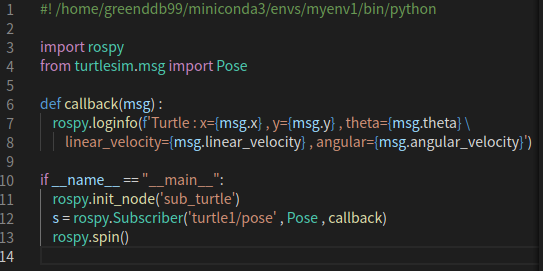

### 四、参数设置
http://www.autolabor.com.cn/book/ROSTutorials/di-2-zhang-ros-jia-gou-she-ji/25-tong-xin-ji-zhi-shi-cao/253-shi-cao-03-fu-wu-diao-yong.html
**【实现步骤】**
1. **用rosparam list 找到关于背景颜色的参数服务器**
2. **初始化节点，用rospy.get_param()，获取当前参数值**
3. **用rospy.get.param(),设置目标参数服务器想要的参数**
**【源代码】**
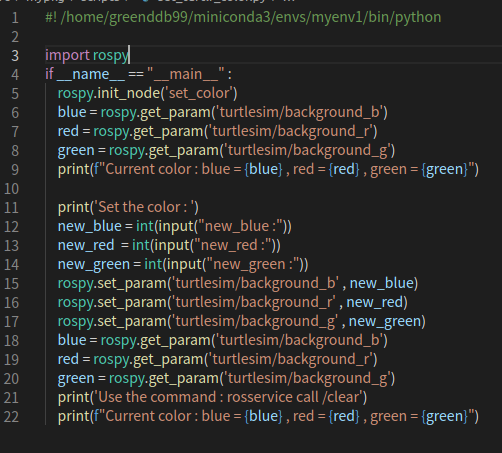

# 元功能包的实现
教程：http://www.autolabor.com.cn/book/ROSTutorials/5/41-rosyuan-gong-neng-bao.html
视频：https://www.bilibili.com/video/BV1Ci4y1L7ZZ?p=147

# 不同工作空间存在同名功能包的注意点
http://www.autolabor.com.cn/book/ROSTutorials/5/41-rosgong-zuo-kong-jian-fu-gai.html

# 避免ros节点重名
http://www.autolabor.com.cn/book/ROSTutorials/5/42-rosjie-dian-ming-cheng-zhong-ming.html
**【避免方法】**
### 在rosrun下：
1. **增加命名空间 ：rosrun turtlesim turtlesim_node __ns:=/命名空间名**

2. **对节点进行重命名（不适用于python）**

### 在launch下：
1. **可采用重命名或增加命名空间或分组的方法**

### 在python程序下：
1. **rospy.init_node('name',anonymous=True)

# 修改ros话题名称
http://www.autolabor.com.cn/book/ROSTutorials/5/43-roshua-ti-ming-cheng-zhong-ming.html
**【修改方法】**
### 在rosrun下：
1. **启动节点时修改 ：rosrun turtlesim turtlesim_node /turtle1/cmd_vel:=/cmd_vel === 后面的（：=）表示将什么重命名为什么，即修改话题名**

### 在launch下：
2. **在节点块下接remap子集 from=‘原话题’ to=‘新话题’

### 在python下：
1. **在创建发布者/订阅者时，rospy.Publisher("话题名"....)**

2. **全局名称：话题名填 /xxx ，把话题放在根目录，当用 rostopic list时显示 /xxx**

3. **相对名称：话题名填 xxx ，把话题放在节点下，若节点 bbb 有命名空间__ns:=yyy ，则 rostopic list 显示 /yyy/xxx**

4. **私有名称：话题名填 ~xxx ，把话题放在节点的子目录下，若节点 bbb 有命名空间__ns:=yyy ，则 rostopic list 显示  /yyy/bbb/xxx
https://www.bilibili.com/video/BV1Ci4y1L7ZZ?p=171

# ros参数名称添加前缀
http://www.autolabor.com.cn/book/ROSTutorials/5/45-roscan-shu-ming-cheng-she-zhi/451-rosrunshe-zhi-can-shu.html
### 在rosrun下：
1. **启动节点时，最后加上 \_参数名：= 参数**

### 在launch下：
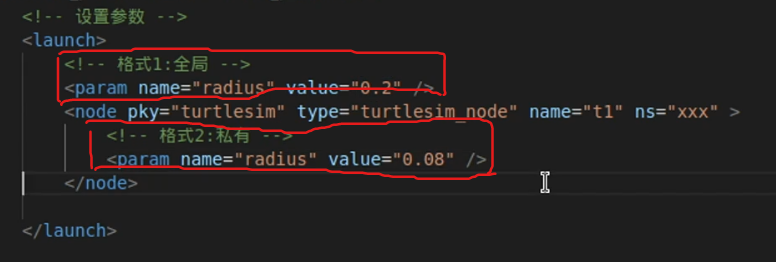

### 在python下：
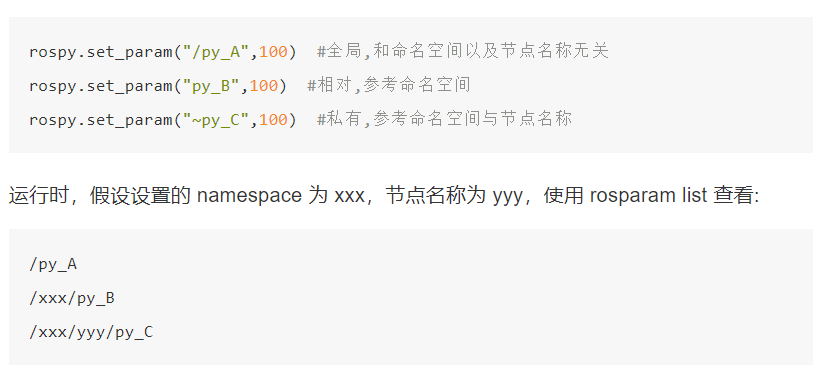

# ros的分布式通信
**【设置主从机，从而在不同计算机上实现通信】**
http://www.autolabor.com.cn/book/ROSTutorials/5/44-rosfen-bu-shi-tong-xin.html
https://www.bilibili.com/video/BV1Ci4y1L7ZZ?p=177 






# ros的tf2库
#### 官方教程：http://wiki.ros.org/tf2/Tutorials
#### 第三方：http://www.autolabor.com.cn/book/ROSTutorials/di-5-zhang-ji-qi-ren-dao-hang/51-tfzuo-biao-bian-huan.html
#### 第三方：https://www.ncnynl.com/archives/201611/1076.html
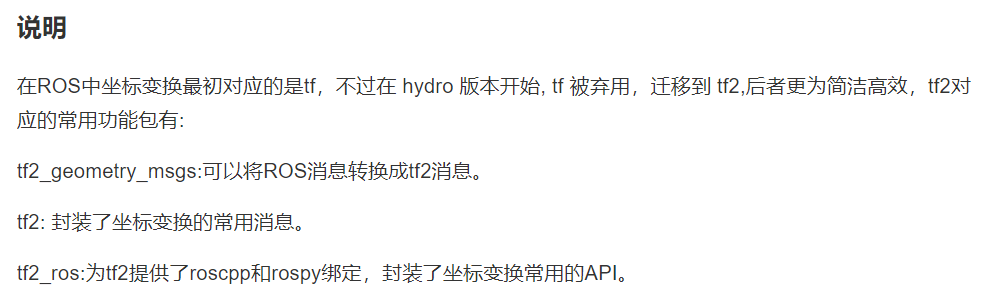
# 一、静态坐标变换：
## 1、要使用tf2发布接受消息首先要直到其消息格式
http://www.autolabor.com.cn/book/ROSTutorials/di-5-zhang-ji-qi-ren-dao-hang/51-tfzuo-biao-bian-huan/511-zuo-biao-msg-xiao-xi.html

1. **描述坐标的常用msg：geometry_msgs/TransformStamped 和 geometry_msgs/PointStamped**

2. **分别用 rosmsg info 查询两个消息的格式**
> 1. **TransformStamped 描述坐标之间的偏移关系**
>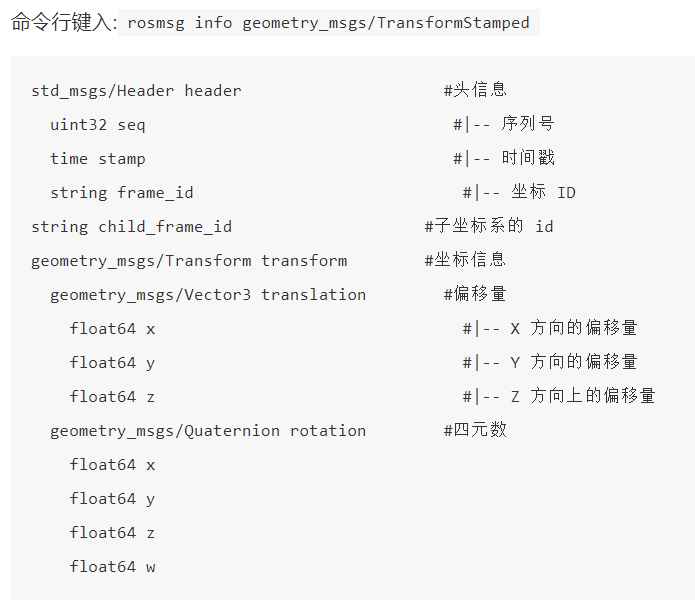
> 2. **PointStamped 描述空间中的坐标点信息**
>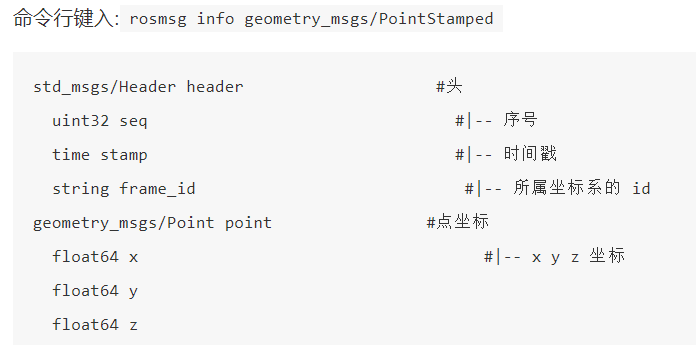

## 2、用python发布坐标信息并且接收转换后的信息
http://www.autolabor.com.cn/book/ROSTutorials/di-5-zhang-ji-qi-ren-dao-hang/51-tfzuo-biao-bian-huan/512-jing-tai-zuo-biao-bian-huan.html
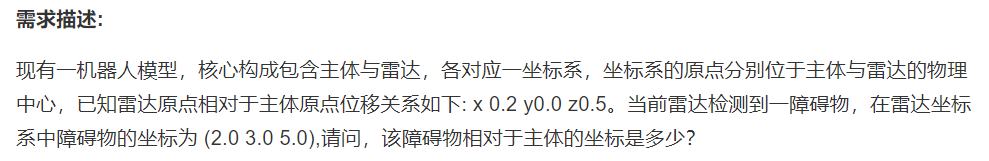
**【！！python3使用tf时的大坑：因为tf默认在python2中启用，所以会报错】**
**解决方法：**
https://blog.csdn.net/weixin_44075048/article/details/113485399
https://answers.ros.org/question/326226/importerror-dynamic-module-does-not-define-module-export-function-pyinit__tf2/

### 【发布方】
**【步骤】**
1. **导入要使用的包**
2. **创建静态坐标广播器 tf2_ros.StaticTransformBroadcaster()**
3. **填入消息 TransformStamped 需要的内容，其中四元数用 tf.transformations.quaternion_from_euler(绕x转roll , 绕y转sptch , 绕z转yaw)将欧拉角转变为四元数。**
4. **将填好的消息通过广播器广播出去 .sendTransform(msg)**
5. **rospy.spin() 挂起**

**【练习代码】**
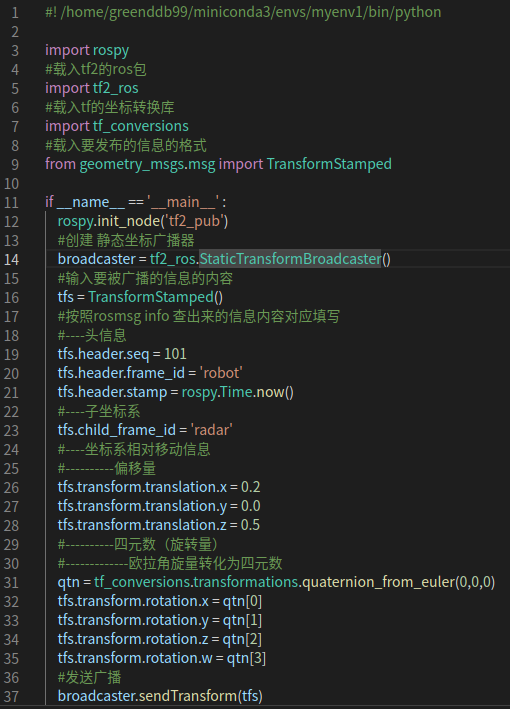
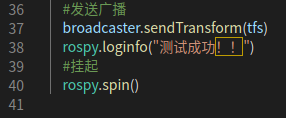

**【解决巨坑】**
> **在运行tf_conversions调用欧拉角转化为四元数的方法时，产生错误"ImportError: dynamic module does not define module export function (PyInit_PyKDL)"**
> **原因是：ros默认将PyKDL安装在python2.7里，而程序的编译器为python3.6，因此导致不能编译**
> **解决方法，重新编译PyKDl，并且将PyKDL给入到conda虚拟环境内**
**详见：https://blog.csdn.net/qq_42237662/article/details/109783935**
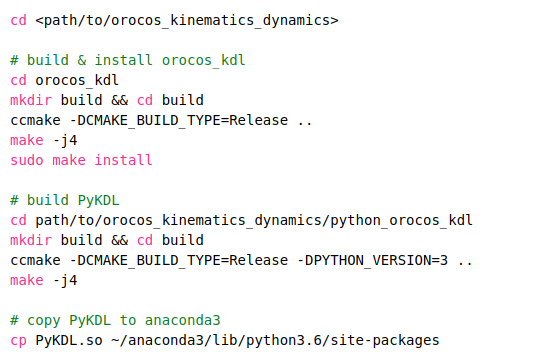
> **【问题2】：当上述操作都执行完后，在python中import PyKDL时报错“ImportError: \/home\/greenddb99\/miniconda3\/envs\/myenv1\/lib\/python3.6\/site-packages\/PyKDL.cpython-36m-x86_64-linux-gnu.so: undefined symbol _ZN3KDL4TreeC1ERKSs“**
> **原因是：在conda环境的dist-packages路径上有另一个 .so文件与我移入的文件冲突，将去删去即可**


### 【接收方】
**【步骤】**
1. **导入要使用的包（消息类型从 tf2_geometry_msgs 导入,因为后面要用到 tf2 的方法对 写入的消息类型和接受的坐标进行转化，所有写入的消息类型要从 tf2 导入）**
2. **当函数运行到主函数时**
3. **初始化一个节点**
4. **创建一个tf2的缓存，之后创建一个订阅对象，将订阅到的消息存入缓存中**
5. **因为要模拟雷达获取的物体坐标，而雷达获取物体坐标时连续的，所以创建一个 while 循环，当 rospy 关闭时才停止，并且用 rospy.Rate（）创建一个频率，在循环内用 rospy.Rate.sleep()来使 while循环以设定的频率循环**
6. **在 while循环中，将雷达获取的物体坐标赋值给消息类型内**
7. **创建一个 try-except 结构，因为在执行坐标转化方法时，若发布者还没将坐标系发布过来，那么坐标转化函数 tf2_ros.Buffer.transfrom(坐标点，目标坐标系) 中的目标坐标系将无法找到，所以用 try--except 结构来处理错误。**

**【练习代码】**
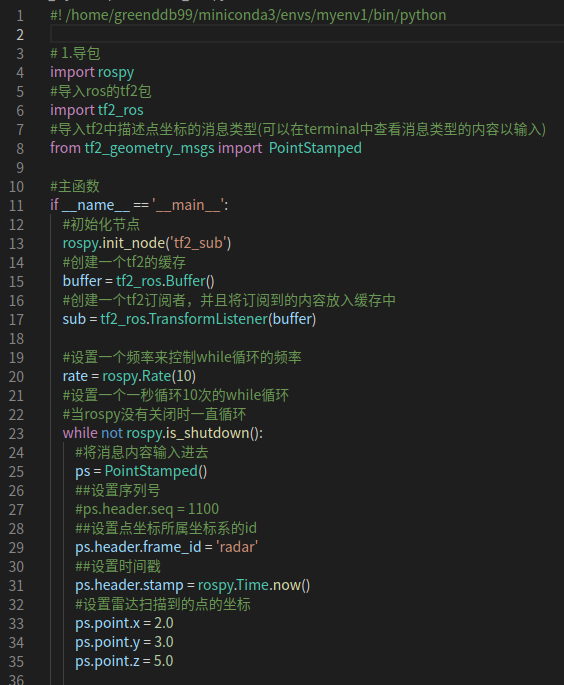
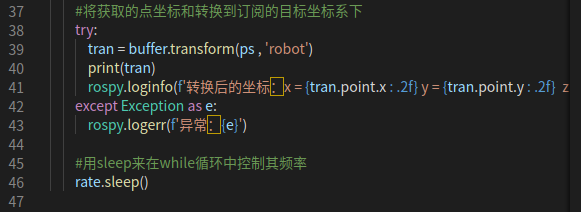

## 补充
**【注：欧拉角为弧度制】**
### 补充1:
**当坐标系之间的相对位置固定时，那么所需参数也是固定的: 父系坐标名称、子级坐标系名称、x偏移量、y偏移量、z偏移量、x 翻滚角度、y俯仰角度、z偏航角度，实现逻辑相同，参数不同，那么 ROS 系统就已经封装好了专门的节点，使用方式如下:**

**rosrun tf2_ros static_transform_publisher x偏移量 y偏移量 z偏移量 z偏航角度 y俯仰角度 x翻滚角度 父级坐标系 子级坐标系**

**示例:rosrun tf2_ros static_transform_publisher 0.2 0 0.5 0 0 0 /baselink /laser**

**也建议使用该种方式直接实现静态坐标系相对信息发布。**

### 补充2:
**可以借助于rviz显示坐标系关系，具体操作:**

**新建窗口输入命令:rviz;
在启动的 rviz 中设置Fixed Frame 为 base_link;
点击左下的 add 按钮，在弹出的窗口中选择 TF 组件，即可显示坐标关系。**


# 二、动态坐标变换：
## 实例：将乌龟世界坐标(左下角)和乌龟自身的坐标相对位置动态发布
**【操作思路】**
### 发布方
> 1. **发布方订阅到乌龟的 Pose 信息，并将其作为输入给到回调函数**
> 2. **在回调函数内创建tf2广播，并且将 pose 信息给到 TransforStamped 内，最后将 TransforStamped 消息广播出去**
> 3. **主函数中初始化节点，订阅乌龟1的pose话题的Pose信息，并且引用回调函数**
> 4. **spin（）挂起**

**【实践代码】**

In [ ]:
#! /home/greenddb99/miniconda3/envs/myenv1/bin/python

"""
1. 乌龟左下角为世界坐标系，乌龟自身可以当作世界坐标系上的点也可以当作子坐标系
2.发布方任务
    1.订阅乌龟相对于世界坐标的偏移信息 Pose 给到 TransformStamped
        由此构建了世界坐标系和乌龟子坐标系的相对位置。
    2. 使用tf2_ros内的广播器将订阅到的内容发布出去。（由订阅的回调函数实现）

"""
######  1. 导入相关的包
from numpy import broadcast
import rospy
# 导入tf2包
import tf2_ros
# 导入tf2坐标转换包
import tf_conversions
# 导入父子坐标的转换信息戳消息类型
from geometry_msgs.msg import TransformStamped
# 导入乌龟位置信息消息类型
from turtlesim.msg import Pose 

####### 2. 创建回调函数(订阅到的Pose为输入，执行结果为广播发布)
def  trans_pose (pose):
    # 创建一个tf2的广播器
    broadcast = tf2_ros.TransformBroadcaster()
    # 导入父子坐标的转换信息戳的消息类型，并且将Pose的的坐标输入
    #----->头消息（父类）
    ts = TransformStamped()
    ts.header.seq = 101
    ts.header.frame_id = 'world'
    ts.header.stamp = rospy.Time.now()
    #----->子类坐标
    ts.child_frame_id = 'turtle1'
    #----->子类坐标相对于父类的偏移量
    ts.transform.translation.x = pose.x
    ts.transform.translation.y = pose.y
    ts.transform.translation.z = 0
    #----->子类坐标相对于父类的旋转量
    quaternion = tf_conversions.transformations.quaternion_from_euler(0,0,pose.theta)
    ts.transform.rotation.x = quaternion[0]
    ts.transform.rotation.y = quaternion[1]
    ts.transform.rotation.z = quaternion[2]
    ts.transform.rotation.w = quaternion[3]
    # 将父子坐标转换信息戳广播出去
    broadcast.sendTransform(ts)

###### 3. 主函数
if __name__ == '__main__':
    #初始化节点
    rospy.init_node('turtle_trans_world_self_pub')
    #订阅乌龟的/turtle1/pose话题的Pose消息类型并引用回调函数
    rospy.Subscriber('/turtle1/pose' , Pose , trans_pose)
    #挂起
    rospy.spin()

### 接收方
> 1.**同普通的接受tf2消息程序，初始化节点，创建缓存，将订阅的信息存入缓存，用while循环和Rate频率创建一个定频的循环，在循环内将 PointStamped 消息输入进去，并且应用 try-except 结构将 buffer.transform(点信息，目标坐标系) 转换好的坐标通过 loginfo 输出，并且处理报错，通过sleep限定循环频率。**
> 2.**注意：此时的 PointStamped 的时间戳不要设置成 .now 而设置成0，因为这样可以避免发布方的时间戳和接收方的时间戳时间不一致导致坐标变换代码报错**

**【实践代码】**

In [ ]:
#! /home/greenddb99/miniconda3/envs/myenv1/bin/python


# 1.导包
import rospy
#导入ros的tf2包
import tf2_ros
#导入tf2中描述点坐标的消息类型(可以在terminal中查看消息类型的内容以输入)
from tf2_geometry_msgs import  PointStamped

#主函数
if __name__ == '__main__':
    #初始化节点
    rospy.init_node('turtle_trans_world_self_sub')
    #创建一个tf2的缓存
    buffer = tf2_ros.Buffer()
    #创建一个tf2订阅者，并且将订阅到的内容放入缓存中
    sub = tf2_ros.TransformListener(buffer)

    #设置一个频率来控制while循环的频率
    rate = rospy.Rate(10)
    #设置一个一秒循环10次的while循环
    #当rospy没有关闭时一直循环
    while not rospy.is_shutdown():
        #将消息内容输入进去
        ps = PointStamped()
        ##设置序列号
        #ps.header.seq = 1100
        ##设置点坐标所属坐标系的id
        ps.header.frame_id = 'turtle1'
        ##设置时间戳(不用now是因为使用now会导致设置点坐标的发布方发布
        #                          world坐标系时的时间产生时间差，从而导致下面的 
        #                           transform报错，因此将其设定为0)
        ps.header.stamp = rospy.Time() 
        #设置乌龟相对与乌龟坐标系的坐标
        ps.point.x = 0.0
        ps.point.y = 0.0
        ps.point.z = 0.0

        #将获取的点坐标和转换到订阅的目标坐标系下
        try:
            tran = buffer.transform(ps , 'world')
            print(tran)
            rospy.loginfo(f'转换后的坐标：x = {tran.point.x : .2f} y = {tran.point.y : .2f}  z = {tran.point.z : .2f}')
        except Exception as e:
            rospy.logerr(f'异常：{e}')
        
        #用sleep来在while循环中控制其频率
        rate.sleep()


# 三、多子坐标的坐标变换

## 实例：建立两个子坐标系son1与son2，并且完成输出son1与son2的相对坐标关系，完成输出将son1上的坐标点转换到son2下的坐标

**【操作思路】**
### 发布方
1. **两个子 TransStamped 消息的发送通过 launch ，引用 tf2_ros 包内类型为
    static_transform_publisher 的节点，将其命名为 son1/son2 ，并且用args
    输入参数值，并且用output = “screen”将报告日志发送到屏幕。**
**【实现代码】**
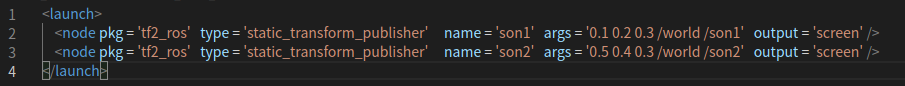
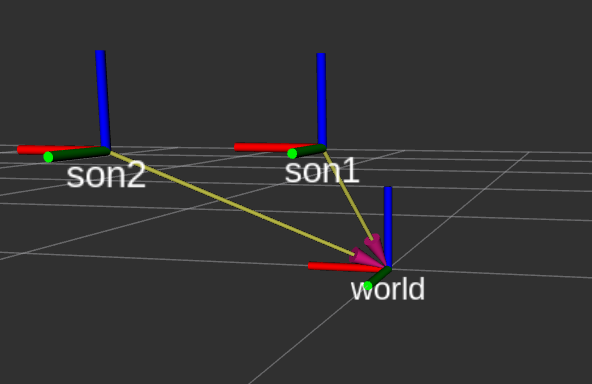

**【操作思路】**
### 订阅方
1. **创建一个缓存和一个tf2的转换订阅者**

2. **为了不断接收发送方发来的坐标信息，使用 while循环 ，并且使用 Rate 和sleep 限制循环的执行屏率。**

3. **在循环内的 try 中调用缓存 Buffer中的方法 ：
    .lookup_transform(self ,  traget_frame, source_frame , time , timeout = rospy.Duration(时间间隔) ) 
    用来计算两坐标的相对坐标信息。
   『 self ： 类方法引用时的类本身，不用填写
     target_frame : 目标坐标系
     source_frame : 源坐标系
     time : 多少时间后获得转换后的结果，输入0即rospy.Time()，则为实时获取
     timeout ： 等待多少的时间间隔来确保target_frame 已可获取』**

4. **使用 PointSTamped 创建一个以 son1 为坐标系的坐标点 ，并且通过
    Buffer 中的方法 .transform(object_stamped , target_frame , timeout ， new_type )
    来将 son1 中的坐标点转换到 son2 坐标系下。
     『object_stamped : 要转换的点的坐标戳
      target_frame : 目标坐标系
      timeout : 等待多少时间间隔来确保 target_frame 已可获取
      new_type : 将object_stamped转换为新的类型，一般不写。

5. **常规使用 loginfo 输出，并且用 except 处理报错。**

**【实现代码】**


In [ ]:
###### 导包
from cmath import e
import rospy
import tf2_ros
# 还要导入转换坐标戳以订阅广播出去的子坐标
from geometry_msgs.msg import TransformStamped
# 还要导入tf2格式的点坐标戳，用来进行坐标变换
from tf2_geometry_msgs import PointStamped

###### 主程序
if __name__ == '__main__':
    rospy.init_node('tf2_2son_sub')
    # 创建缓存
    buffer = tf2_ros.Buffer()
    # 创建变换坐标的订阅者
    listener = tf2_ros.TransformListener(buffer)
    # 创建频率参数，与后面的sleep配合控制while循环的频率
    rate = rospy.Rate(1)
    # 当rospy不被中断时执行while循环
    while not rospy.is_shutdown() :
        try:
            #使用 .lookup_transform() 来输出源坐标系与目标坐标系的坐标关系
            sons_tsf = buffer.lookup_transform('son2' , 'son1' , rospy.Time() , rospy.Duration(0.5))
            #print(sons_tsf) 用来看转换后的结果是什么，忽略
            """
            header: 
                seq: 0
                stamp: 
                    secs: 0
                    nsecs:         0
                frame_id: "son2"
                child_frame_id: "son1"
                transform: 
                    translation: 
                        x: -0.4
                        y: -0.2
                        z: 0.0
                    rotation: 
                        x: 0.0
                        y: 0.0
                        z: 0.0
                        w: 1.0
            """
            #将变换结果输出出来
            rospy.loginfo('son1 与 son2 的坐标关系 ：')
            rospy.loginfo(f'作为父系的坐标系：{sons_tsf.header.frame_id}')
            rospy.loginfo(f'作为子系的坐标系：{sons_tsf.child_frame_id}')
            rospy.loginfo(f'转换后的相对位置坐标 ：\
             x = {sons_tsf.transform.translation.x : 0.2f}\
             y = {sons_tsf.transform.translation.y : 0.2f}\
             z = {sons_tsf.transform.translation.z : 0.2f}')

             # 创建一个在 son1 下的坐标点
            ps = PointStamped()
            ps.header.frame_id = 'son1'
            ps.header.stamp = rospy.Time.now()
            ps.point.x = 1
            ps.point.y = 1
            ps.point.z = 1
            # 对 son1 下的坐标点变换到 son2 下
            ps_tsf = buffer.transform(ps , 'son2' , timeout = rospy.Duration(0.5))
            # 输出结果
            rospy.loginfo(f'转换后所属的坐标系 ：{ps_tsf.header.frame_id}')
            rospy.loginfo(f'将son1下【1,1,1】的坐标转换到son2下时的坐标\
            x = {ps_tsf.point.x : 0.2f}\
            y = {ps_tsf.point.y : 0.2f}\
            z = {ps_tsf.point.z : 0.2f}')

        except Exception as e :
            rospy.logerr(f'错误提示：{e}' )


        rate.sleep()

**【用launch文件直接同时启动发布方和订阅方】**
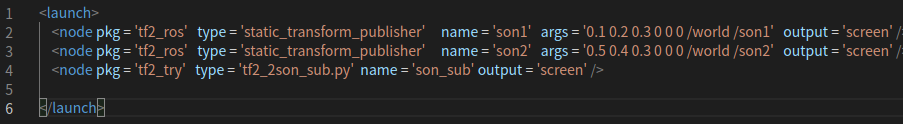

# 四、乌龟追踪实例
## 实现用键盘操控一只乌龟，另一只乌龟对其进行跟随
**【具体实现】**
> 1. **用 launch 打开乌龟节点，键盘控制节点**
> 2. **用 python 写一个生成乌龟的服务，而后将其放入 launch中**
> 3. **用 python 写一个订阅乌龟坐标信息，并通过 TransformStamped 广播出去的发布者，并且应用 launch 的动态传参进行复用来分别订阅与发布俩个乌龟**
> 4. **用 python 写一个订阅两乌龟 TransformStamped 信息并且用 .lookup_transform 转换出两坐标系之间的相对位置，通过对坐标的算法实现乌龟2的 P控制，而后将算法得到的输入给到 乌龟2控制话题 cmd_vel 中的乌龟控制消息 Twist 中，时乌龟2跟着乌龟1运动.**

### 1、生成一个乌龟
**【算法实现】**

In [ ]:
#! /home/greenddb99/miniconda3/envs/myenv1/bin/python

###### 导包
import rospy
# 订阅生成乌龟服务
from turtlesim.srv import Spawn , SpawnRequest , SpawnResponse
import math


###### 主程序
if __name__ == '__main__' :
    # 初始化节点
    rospy.init_node('spawn_turtle')
    # 订阅服务(通过rosservice查)
    spawn = rospy.ServiceProxy('/spawn' , Spawn)
    # 等待服务打开
    rospy.wait_for_service('/spawn')
    # 给服务传入request
    req = SpawnRequest()
    req.x = 1.0
    req.y = 1.0
    # 新乌龟为延z旋转90度朝向
    # nin = math.pi/2
    # nin = float(f'{nin : .2f}')
    # print(nin)
    req.theta = math.pi/2 
    req.name = 'turtle2'

    # 用try-except调用服务
    try:
        spawn.call(req)
        rospy.loginfo(f'乌龟创建成功，名字为：{req.name}')
    except Exception as e :
        rospy.logerr(f'错误提示：{e}')

### 2、订阅乌龟pose并且广播两乌龟相对于世界坐标的位置信息（采用输入参数的方式让程序得以合理复用）
**【代码实现】**

In [ ]:
#! /home/greenddb99/miniconda3/envs/myenv1/bin/python

"""
目的：通过动态传参的方式，分别获取两乌龟的pose信息，并且将其用
            TransformStamped 广播出去
"""

###### 导包
import imp
from numpy import broadcast
import rospy
# 导入tf2包
import tf2_ros
import tf_conversions
# 导入sys包，使用其 .argv 方法进行传参
import sys
# 导入乌龟姿态的数据类型
from turtlesim.msg import Pose
# 导入tf2中的坐标转换信息格式 Transtamped
from geometry_msgs.msg import TransformStamped

# 创建一个乌龟名字变量来储存输入的名字参数
turtle_name = ''


###### 回调函数：输入Tranformstamped并且广播出去
def trans_pose (pose):
    # 创建广播
    broadcast = tf2_ros.TransformBroadcaster()

    ts = TransformStamped()
    # 头数据
    ts.header.frame_id = 'world'
    ts.header.stamp = rospy.Time.now()
    # 子坐标名
    ts.child_frame_id = turtle_name
    # 子坐标对于头坐标的相对位移
    ts.transform.translation.x = pose.x
    ts.transform.translation.y = pose.y
    ts.transform.translation.z = 0
    # 子坐标对于头坐标的旋转
    ## 采用函数将欧拉角转换为四元数
    quaternion = tf_conversions.transformations.quaternion_from_euler(0,0,pose.theta)
    ts.transform.rotation.x = quaternion[0]
    ts.transform.rotation.y = quaternion[1]
    ts.transform.rotation.z = quaternion[2]
    ts.transform.rotation.w= quaternion[3]

    # 将坐标信息广播出去
    broadcast.sendTransform(ts)


###### 主函数
if __name__ == '__main__' :
    # 初始化节点
    rospy.init_node('trans_turtles_position')

    # 判断输入的乌龟的名字作为参数,sys.argv[0]为文件名，sys.argv[1]才为输入的名字
    if len(sys.argv) < 2 :
        rospy.loginfo('请在执行命令后输入乌龟的名字作为参数')
    else :
        turtle_name = sys.argv[1]
        rospy.loginfo(f'所订阅的乌龟为：{turtle_name}')
    
    # 创建订阅对象
    rospy.Subscriber(turtle_name + '/pose' , Pose , trans_pose)

    # 挂起
    rospy.spin()

### 3、乌龟跟随
**【代码实现】**

In [ ]:
#! /home/greenddb99/miniconda3/envs/myenv1/bin/python

"""
目的：分别订阅两个乌龟相对于世界坐标的位置信息 Transformtramped
            (参考two_son_position)，之后使用 buffer下的相对位置转换函数
            得到两个乌龟之间的坐标关系，之后利用两个乌龟之间的坐标关系
            用 P控制的方式写算法，给到乌龟2控制话题的 Twist 消息，使其自
            动跟随乌龟1。
"""
###### 导包
from re import I
from time import sleep
import rospy
import tf2_ros
from geometry_msgs.msg import   Twist
import math


###### 主函数
if __name__ == '__main__' :
    # 初始化节点
    rospy.init_node('trace')
    # 创建一个缓存
    buffer = tf2_ros.Buffer()
    # 创建一个订阅者，将广播的信息订阅下来放入缓存
    listener = tf2_ros.TransformListener(buffer)
    # 创建一个发布者将计算好的乌龟2的运动信息发送出去
    publisher = rospy.Publisher('/turtle2/cmd_vel' , Twist , queue_size=1000)

    # 创建一个频率
    rate = rospy.Rate(10)
    # 构造一个给定频率的while循环，使可以实时计算两乌龟相对位置关系
    while not rospy.is_shutdown():
        rate.sleep()
        try:
            # 获得两个乌龟的相对位置(因为是要让乌龟2动，所以一定要以乌龟2为父坐标，否则会时乌龟运动轨迹不正确，详情看图解)
            position = buffer.lookup_transform('turtle2' , 'turtle1' , rospy.Time() , rospy.Duration(0.5))
            # print(position) 用来检查position输出到底是什么，方便后面书写

            # 调用乌龟2的控制信息Twist
            twist = Twist()
            # 通过两乌龟之间相对的x与y距离，求出两点间距离作为误差，乘以系数，P控制
            twist.linear.x = math.sqrt(math.pow(position.transform.translation.x , 2) + math.pow(position.transform.translation.y , 2))
            # print('两龟之间的直线距离：' ,math.sqrt(math.pow(position.transform.translation.x , 2) + math.pow(position.transform.translation.y , 2)))
            # 通过两乌龟之间的y比x得出两乌龟之间的tan值，利用atan2反三角求出两乌龟之间的夹角弧度作为误差，乘与系数，P控制
            #注：atan2是通过输入两点，从而自行计算反正切的弧度，而atan是输入一个树，返回一个弧度
            #https://github.com/o2team/H5Skills/issues/17
            twist.angular.z = 2*math.atan2(position.transform.translation.y  , position.transform.translation.x)
            # print('两龟之间的夹角弧度：' , math.atan2(position.transform.translation.y  , position.transform.translation.x))


            # 将位移信息发送给乌龟2
            publisher.publish(twist)

        except Exception as e :
            rospy.logerr(f'报告错误：{e}')

### 4、【上述代码的易错点】
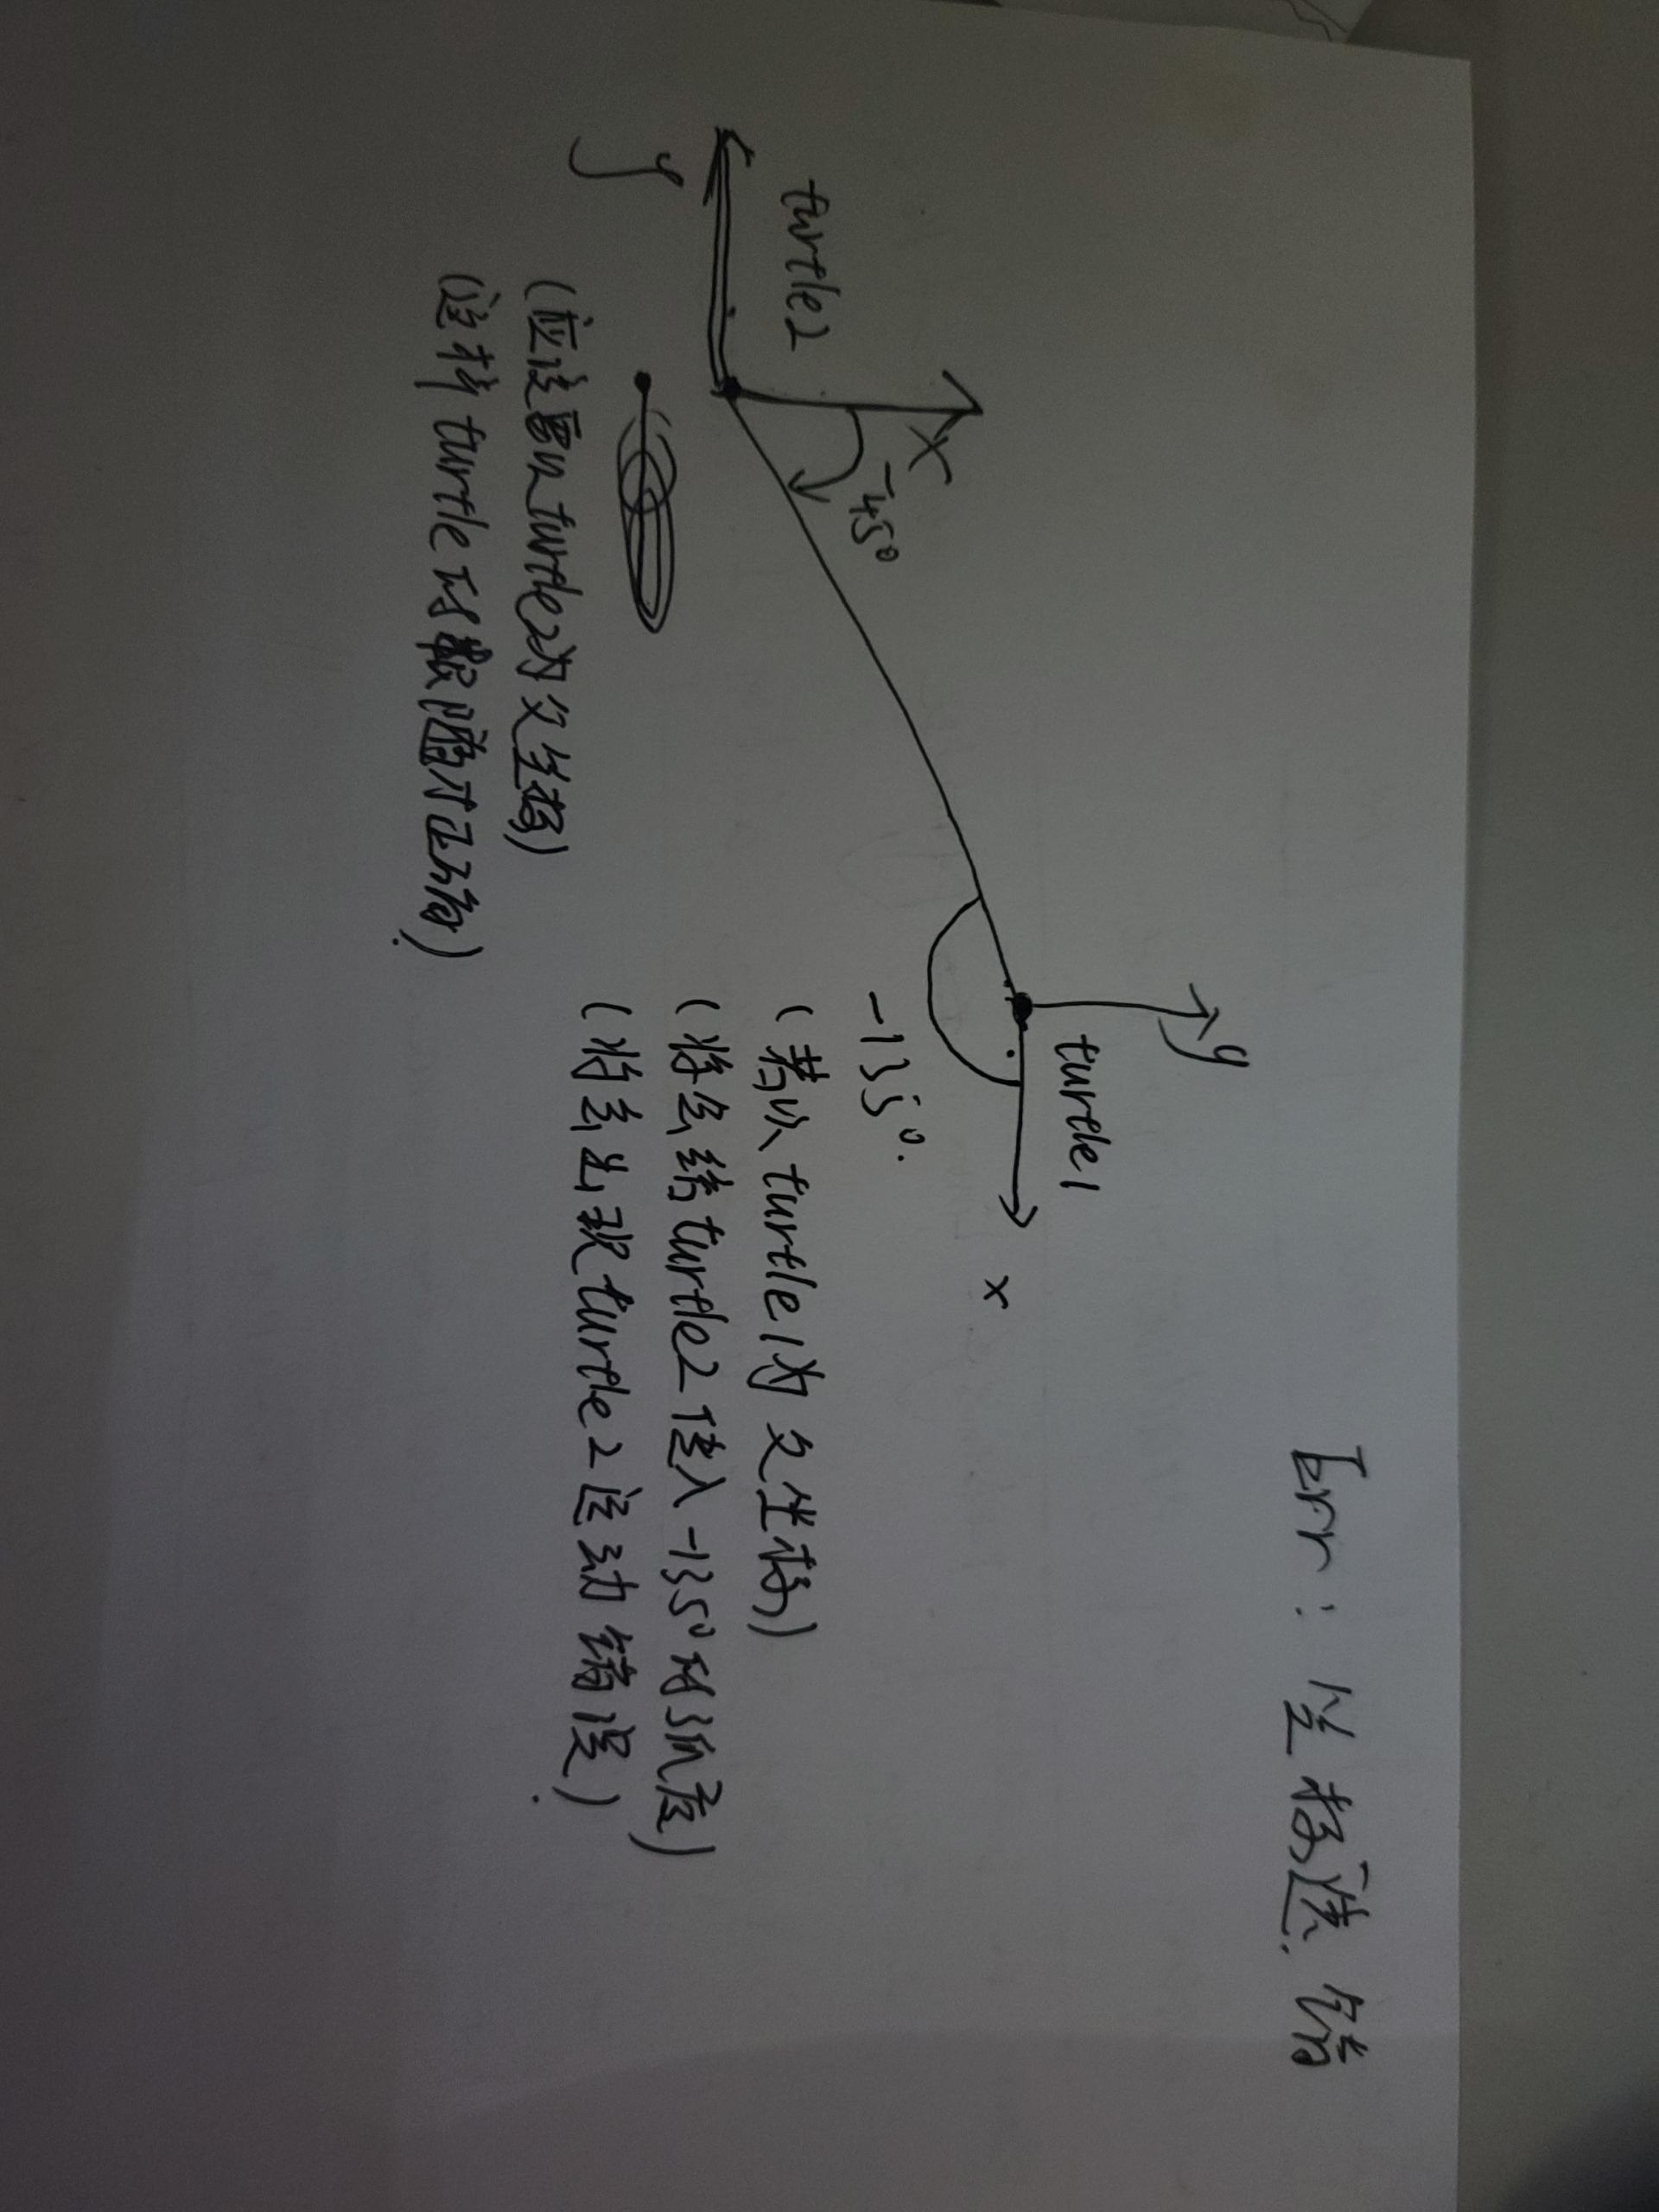

### 5、将代码用launch整合封装
**【代码实现】**

In [2]:
<launch>
    <!-- 创建乌龟节点 -->
    <node   pkg = 'turtlesim'   type = 'turtlesim_node'          name = 'turtle_node'/>
    <!-- 打开键盘控制器 -->
    <node   pkg = 'turtlesim'   type = 'turtle_teleop_key'     name = 'turtle_teleop'/>
    <!-- 打开生成乌龟2的程序 -->
    <node   pkg = 'tf2_try'        type = 'spawn_turtle.py'        name = 'creat_turtle'      output = 'screen'/>
    <!-- 分别广播两个乌龟的 Transforntamped -->
    <node   pkg = 'tf2_try'        type = 'bc_2turtle_location.py'        name = 'turtle1'      args = 'turtle1'    output = 'screen'/>
    <node   pkg = 'tf2_try'        type = 'bc_2turtle_location.py'        name = 'turtle2'      args = 'turtle2'    output = 'screen'/>
    <!-- 乌龟追随指令 -->
    <node   pkg = 'tf2_try'         type = 'trace.py'       name = 'trace_turtlr'   output = 'screen'/>
</launch>

<!-- ！！！注意，命令结束的最后的斜杠不可以加空格<   /> -->

NameError: name '图片' is not defined

# rqt工具箱
## rqt_graph :显示节点之间的话题订阅关系
## rqt_console : 查看log日志
## rqt_plot ：获得消息并绘制图像(按时间)
## rqt_bag : 录制与播放

# URDF文件与gazabo仿真和rviz可视化
http://www.autolabor.com.cn/book/ROSTutorials/di-6-zhang-ji-qi-ren-xi-tong-fang-zhen/62-fang-zhen-urdf-ji-cheng-rviz/623-urdfyu-fa-xiang-jie-robot.html

# 设置主从机（主机使用roscore，主从机可以任意通讯）
## 1.将主从机连接到同一个网络下
## 2.将主从机分别改称手动ip，即用ifconfig查看ip，后在网络连接设置里更改手动并填写
## 3.主从机分别进入/etc/hosts 添加 【 ip地址    另一个计算机名】
## 4.ping 主机或从机名 看看主机或从机是否可以通讯
## 5.主机进入~/.bashrc 添加下述内容
> **1. export ROS_MASTER_URI=http://主机IP:11311**
> **2. export ROS_HOSTNAME=主机IP**
## 6.从机进入~/.bashrc 添加下述内容
> **1. export ROS_MASTER_URI=http://主机IP:11311**
> **2. export ROS_HOSTNAME=从机IP**

### 因为虚拟机无法使用gpu，因此部署win10的ros而后与虚拟机中的ros进行通讯
每次使用时都要在cmd上运行C:\opt\ros\melodic\x64\setup.bat

# 7. 安装moveit
https://moveit.ros.org/install/source/
### 这一步记得换 .rosinstall里面源，用镜像。https://ghproxy.com/
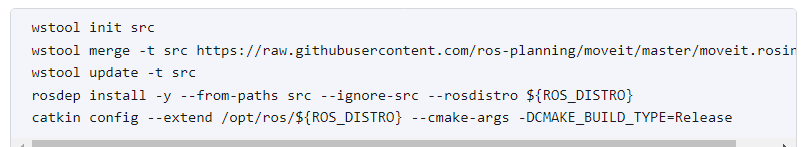

# 8、当使用
# 出现Cannot locate rosdep definition
### 1、若出现没安装的包，则直接安装，若出现已安装的包，去报错的包里的package.xml里查看是否拼写出错
### 如：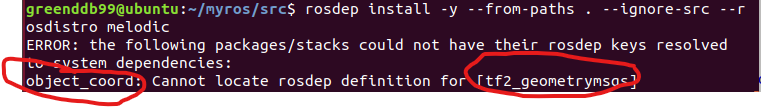
### package.xml文件：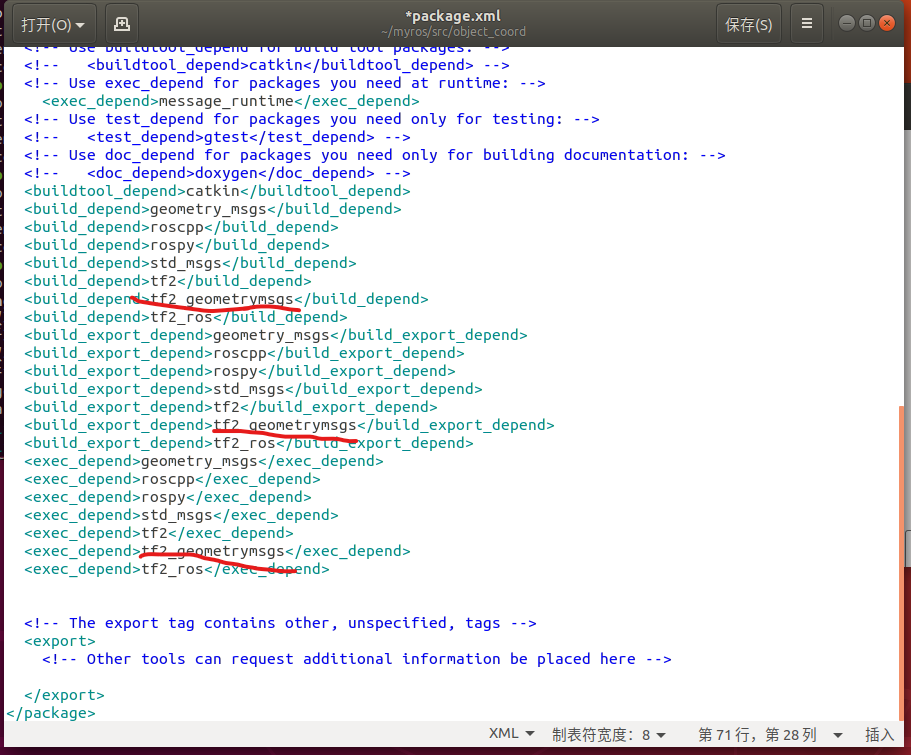
https://answers.ros.org/question/320734/cannot-locate-rosdep-definition/?msclkid=49cec432ce8711ec9ab635841664f013